In [1]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from tensorflow.python.client import device_lib
import os
import matplotlib.dates as mdates
import datetime
from calendar import monthrange
import pyupbit
import time

In [5]:
'''Over All Variables'''
x_step = 50
y_step = 12
train_rate = 0.9
csv_path = "KRW-ETH.csv"
dividing = 10000
scale_rate = [[0, 100000000]]
number_of_feature = 6

In [6]:
'''Get Dataset from csv'''
dataframe = pd.read_csv(csv_path)

scaler = RobustScaler()

open_price = dataframe['open'].values / dividing
high_price = dataframe['high'].values / dividing
low_price = dataframe['low'].values / dividing
close_price = dataframe['close'].values / dividing
volume = dataframe['volume'].values
price = dataframe['price'].values / dividing

open_price = np.reshape(open_price, (-1, 1))
high_price = np.reshape(high_price, (-1, 1))
low_price = np.reshape(low_price, (-1, 1))
close_price = np.reshape(close_price, (-1, 1))
price = np.reshape(price, (-1, 1))

open_price = scaler.fit_transform(open_price)
high_price = scaler.fit_transform(high_price)
low_price = scaler.fit_transform(low_price)
close_price = scaler.fit_transform(close_price)
price = scaler.fit_transform(price)
# scaler.fit is fitted by price

open_price = np.reshape(open_price, len(open_price))
high_price = np.reshape(high_price, len(high_price))
low_price = np.reshape(low_price, len(low_price))
close_price = np.reshape(close_price, len(close_price))
price = np.reshape(price, len(price))

In [7]:
open_price_train = open_price[:round(len(open_price) * train_rate)].tolist()
open_price_test = open_price[round(len(open_price) * train_rate):].tolist()
high_price_train = high_price[:round(len(high_price) * train_rate)].tolist()
high_price_test = high_price[round(len(high_price) * train_rate):].tolist()
low_price_train = low_price[:round(len(low_price) * train_rate)].tolist()
low_price_test = low_price[round(len(low_price) * train_rate):].tolist()
close_price_train = close_price[:round(len(close_price) * train_rate)].tolist()
close_price_test = close_price[round(len(close_price) * train_rate):].tolist()
volume_train = volume[:round(len(volume) * train_rate)].tolist()
volume_test = volume[round(len(volume) * train_rate):].tolist()
price_train = price[:round(len(price) * train_rate)].tolist()
price_test = price[round(len(price) * train_rate):].tolist()

open_price_x = []
# open_price_y = []
high_price_x = []
# high_price_y = []
low_price_x = []
# low_price_y = []
close_price_x = []
# close_price_y = []
volume_x = []
# volume_y = []
price_x = []
price_y = []

'''testset dividing'''
'''all array has same length'''
for i in range(len(open_price_train) - x_step - y_step + 1):
    open_price_x.append(open_price_train[i:i + x_step])
    # open_price_y.append(open_price_train[i+x_step:i+x_step+y_step])
    high_price_x.append(high_price_train[i:i + x_step])
    # high_price_y.append(high_price_train[i+x_step:i+x_step+y_step])
    low_price_x.append(low_price_train[i:i + x_step])
    # low_price_y.append(low_price_train[i+x_step:i+x_step+y_step])
    close_price_x.append(close_price_train[i:i + x_step])
    # close_price_y.append(close_price_train[i+x_step:i+x_step+y_step])
    volume_x.append(volume_train[i:i + x_step])
    # volume_y.append(volume_train[i+x_step:i+x_step+y_step])
    price_x.append(price_train[i:i + x_step])
    price_y.append(price_train[i + x_step:i + x_step + y_step])
    
open_price_x = np.array(open_price_x)
# open_price_y = np.array(open_price_y)
high_price_x = np.array(high_price_x)
# high_price_y = np.array(high_price_y)
low_price_x = np.array(low_price_x)
# low_price_y = np.array(low_price_y)
close_price_x = np.array(close_price_x)
# close_price_y = np.array(close_price_y)
volume_x = np.array(volume_x)
# volume_y = np.array(volume_y)
price_x = np.array(price_x)
price_y = np.array(price_y)

open_price_x = np.reshape(open_price_x, (len(open_price_x), len(open_price_x[1]), 1))
high_price_x = np.reshape(high_price_x, (len(high_price_x), len(high_price_x[1]), 1))
low_price_x = np.reshape(low_price_x, (len(low_price_x), len(low_price_x[1]), 1))
close_price_x = np.reshape(close_price_x, (len(close_price_x), len(close_price_x[1]), 1))
volume_x = np.reshape(volume_x, (len(volume_x), len(volume_x[1]), 1))
price_x = np.reshape(price_x, (len(price_x), len(price_x[1]), 1))

In [8]:
price_y = np.reshape(price_y, (len(price_y), len(price_y[1])))
train_data = np.stack([open_price_x, high_price_x, low_price_x, close_price_x, volume_x, price_x], axis=2)
train_data = np.reshape(train_data, (len(train_data), len(train_data[1]), 6))

In [21]:
model = Sequential()
model.add(LSTM(units=48, input_shape=(train_data.shape[1], train_data.shape[2]), return_sequences=True))
model.add(LSTM(units=24))
model.add(Dense(y_step))

model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

model.fit(train_data, price_y, epochs=5, batch_size=120, verbose=1)

Epoch 1/5
4920/4920 [==============================] - 59s 11ms/step - loss: 0.0065 - accuracy: 0.0835
Epoch 2/5
4920/4920 [==============================] - 54s 11ms/step - loss: 9.1945e-04 - accuracy: 0.0796
Epoch 3/5
4920/4920 [==============================] - 54s 11ms/step - loss: 9.2886e-04 - accuracy: 0.0832
Epoch 4/5
4920/4920 [==============================] - 53s 11ms/step - loss: 6.8805e-04 - accuracy: 0.0877
Epoch 5/5
4920/4920 [==============================] - 54s 11ms/step - loss: 5.2568e-04 - accuracy: 0.0940


In [22]:
validation = np.stack(
    [open_price_x[-2], high_price_x[-2], low_price_x[-2], close_price_x[-2], volume_x[-2], price_x[-2]], axis=2)
validation = np.reshape(validation, (-1, x_step, 6))
print(abs(np.mean((scaler.inverse_transform(model.predict(validation)) * 10000) - scaler.inverse_transform(
    price_y[-2].reshape(1, -1)) * 10000)))
print(scaler.inverse_transform(price_y[-2].reshape(-1, 1)) * 10000)

1/1 [==============================] - 1s 569ms/step
45310.20745309439
[[2411845.95461644]
 [2414778.3722222 ]
 [2420824.51002551]
 [2416612.71126666]
 [2413420.00409464]
 [2413834.69059139]
 [2413669.11145632]
 [2419467.32089183]
 [2418945.56044884]
 [2419544.31188937]
 [2419982.56083283]
 [2420950.40222683]]


In [17]:
open_price_tx = []
# open_price_ty = []
high_price_tx = []
# high_price_ty = []
low_price_tx = []
# low_price_ty = []
close_price_tx = []
# close_price_ty = []
volume_tx = []
# volume_ty = []
price_tx = []
price_ty = []

'''testset dividing'''
'''all array has same length'''
for i in range(len(open_price_test) - x_step - y_step + 1):
    open_price_tx.append(open_price_test[i:i + x_step])
    # open_price_ty.append(open_price_test[i + x_step:i + x_step + y_step])
    high_price_tx.append(high_price_test[i:i + x_step])
    # high_price_ty.append(high_price_test[i + x_step:i + x_step + y_step])
    low_price_tx.append(low_price_test[i:i + x_step])
    # low_price_ty.append(low_price_test[i + x_step:i + x_step + y_step])
    close_price_tx.append(close_price_test[i:i + x_step])
    # close_price_ty.append(close_price_test[i + x_step:i + x_step + y_step])
    volume_tx.append(volume_test[i:i + x_step])
    # volume_ty.append(volume_test[i + x_step:i + x_step + y_step])
    price_tx.append(price_test[i:i + x_step])

    price_ty.append(price_test[i + x_step:i + x_step + y_step])
open_price_tx = np.array(open_price_tx)
# open_price_ty = np.array(open_price_ty)
high_price_tx = np.array(high_price_tx)
# high_price_ty = np.array(high_price_ty)
low_price_tx = np.array(low_price_tx)
# low_price_ty = np.array(low_price_ty)
close_price_tx = np.array(close_price_tx)
# close_price_ty = np.array(close_price_ty)
volume_tx = np.array(volume_tx)
# volume_ty = np.array(volume_ty)
price_tx = np.array(price_tx)
price_ty = np.array(price_ty)

open_price_tx = np.reshape(open_price_tx, (len(open_price_tx), len(open_price_tx[1]), 1))
high_price_tx = np.reshape(high_price_tx, (len(high_price_tx), len(high_price_tx[1]), 1))
low_price_tx = np.reshape(low_price_tx, (len(low_price_tx), len(low_price_tx[1]), 1))
close_price_tx = np.reshape(close_price_tx, (len(close_price_tx), len(close_price_tx[1]), 1))
volume_tx = np.reshape(volume_tx, (len(volume_tx), len(volume_tx[1]), 1))
price_tx = np.reshape(price_tx, (len(price_tx), len(price_tx[1]), 1))

price_ty = np.reshape(price_ty, (len(price_ty), len(price_ty[1])))

In [23]:
test = np.stack(
    [open_price_tx[-2], high_price_tx[-2], low_price_tx[-2], close_price_tx[-2], volume_tx[-2], price_tx[-2]], axis=2)
test = np.reshape(test, (-1, x_step, 6))
print(abs(np.mean((scaler.inverse_transform(model.predict(test)) * 10000).flatten() - scaler.inverse_transform(
    price_ty[-2].reshape(-1, 1)) * 10000)))

1/1 [==============================] - 0s 25ms/step
60985.838510581525


In [24]:
print(scaler.inverse_transform(price_ty[-2].reshape(-1, 1)) * 10000)

[[3092447.0888627 ]
 [3091316.16468166]
 [3093495.267691  ]
 [3096164.17169535]
 [3096865.92791763]
 [3097282.16048788]
 [3097115.77497226]
 [3093039.09770468]
 [3090159.73324357]
 [3089878.83457366]
 [3091569.10426098]
 [3090710.36178165]]


1/1 [==============================] - 0s 24ms/step
[       nan        nan        nan        nan        nan        nan
        nan        nan        nan        nan        nan        nan
 3156883.75 3144492.5  3155625.   3155167.   3154969.75 3155677.
 3162245.75 3154040.75 3146690.75 3145414.   3152530.   3168137.5 ]


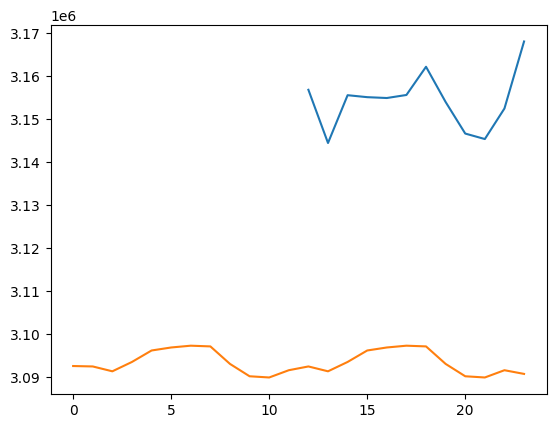

In [25]:
prediction = scaler.inverse_transform(model.predict(test)) * 10000
prediction = np.reshape(prediction, (y_step))
zero = np.array([np.nan] * y_step)
prediction = np.append(zero, prediction)
print(prediction)

valid = scaler.inverse_transform(price_ty[-3].reshape(-1, 1)) * 10000
valid = np.append(valid, scaler.inverse_transform(price_ty[-2].reshape(-1, 1)) * 10000)

plt.plot(prediction)
plt.plot(valid)
# plt.legend()

plt.show()